In [1]:
#train: entrenamis ek modelo
#validacion de predicciones
#test: probamos el accuracy

#Clasificacion Binaria

In [2]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
word_index=dict([(value, key) for (key, value) in word_index.items()])
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
for _ in train_data[0]:
  print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [8]:
#vectorizar: realizar un one hold encoding
def vectorizar(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [9]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

In [10]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [11]:
#enternamiento del modelo de clasificacion binaria
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']#metrica de exito
              )

In [13]:
#validacion
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [14]:
#enternar el modelo
hitory=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6854 - loss: 0.6010 - val_accuracy: 0.8650 - val_loss: 0.4029
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8937 - loss: 0.3467 - val_accuracy: 0.8835 - val_loss: 0.3204
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9196 - loss: 0.2558 - val_accuracy: 0.8886 - val_loss: 0.2882
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9303 - loss: 0.2083 - val_accuracy: 0.8923 - val_loss: 0.2751
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9448 - loss: 0.1713 - val_accuracy: 0.8890 - val_loss: 0.2737
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9527 - loss: 0.1472 - val_accuracy: 0.8871 - val_loss: 0.2792
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9609 - loss: 0.1244 - val_accuracy: 0.8862 - val_loss: 0.2874
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9708 - loss: 0.1030 - val_accuracy: 0.8848 - v

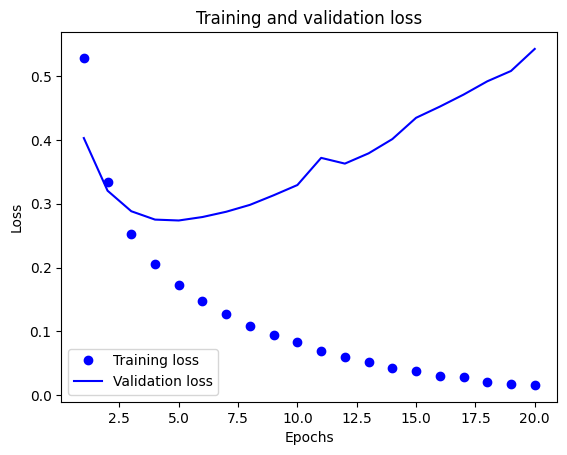

In [15]:
import matplotlib.pyplot as plt
history_dict=hitory.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8525 - loss: 0.6049


[0.595059871673584, 0.8557199835777283]

#Resolver el problema de overfiting
modelo no demasiado listo para reolver un problema
Overfiting: hace fit en el set de entrenamiento


In [17]:
#Regularizacion: la afeitadra de oca, reducir la complejidad del modelo
#reducir los pesos de la red, para procesar, da mas peso a la funcion de costo
#Dropout: apaga un cantidad de nueronas, para que una neurona o una capa no dependa de otra


In [21]:
#modelo menos complejo
model2=models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']#metrica de exito
              )

hitory2=model2.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5760 - loss: 0.6527 - val_accuracy: 0.7221 - val_loss: 0.5764
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7737 - loss: 0.5473 - val_accuracy: 0.7872 - val_loss: 0.5258
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8425 - loss: 0.4856 - val_accuracy: 0.8033 - val_loss: 0.4951
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8823 - loss: 0.4405 - val_accuracy: 0.8378 - val_loss: 0.4670
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9085 - loss: 0.4087 - val_accuracy: 0.8778 - val_loss: 0.4411
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9280 - loss: 0.3782 - val_accuracy: 0.8748 - val_loss: 0.4255
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9412 - loss: 0.3494 - val_accuracy: 0.8701 - val_loss: 0.4162
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9452 - loss: 0.3249 - val_accuracy: 0.8759 - v

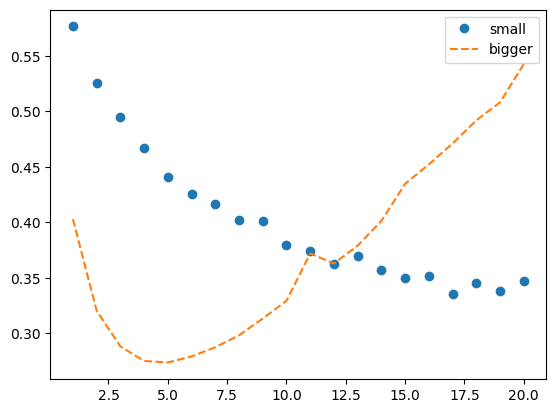

In [22]:
import matplotlib.pyplot as plt
history_dict=hitory.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
val_loss_values_2=hitory2.history['val_loss']


epochs=range(1, len(loss_values)+1)
plt.plot(epochs, val_loss_values_2, 'o', label='small')


plt.plot(epochs, val_loss_values, '--', label='bigger')
plt.legend()
plt.show()

In [23]:
from keras import regularizers

In [25]:
#regularizacion
model3=models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']#metrica de exito
              )

hitory3=model3.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6724 - loss: 0.6696 - val_accuracy: 0.8648 - val_loss: 0.4696
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8866 - loss: 0.4224 - val_accuracy: 0.8806 - val_loss: 0.3794
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9124 - loss: 0.3223 - val_accuracy: 0.8858 - val_loss: 0.3486
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9310 - loss: 0.2739 - val_accuracy: 0.8884 - val_loss: 0.3323
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9353 - loss: 0.2511 - val_accuracy: 0.8788 - val_loss: 0.3504
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9441 - loss: 0.2287 - val_accuracy: 0.8830 - val_loss: 0.3383
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9554 - loss: 0.2075 - val_accuracy: 0.8833 - val_loss: 0.3404
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9543 - loss: 0.2033 - val_accuracy: 0.8799 - v

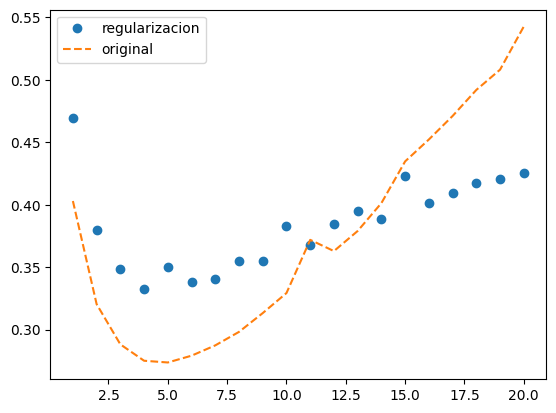

In [28]:
import matplotlib.pyplot as plt
history_dict=hitory.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
val_loss_values_3=hitory3.history['val_loss']


epochs=range(1, len(loss_values)+1)
plt.plot(epochs, val_loss_values_3, 'o', label='regularizacion')


plt.plot(epochs, val_loss_values, '--', label='original')
plt.legend()
plt.show()

In [27]:
#Dropout
model4=models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))#carateristica de 50 por ciento, inactivar el 50% de las neuronas en cada iteracion
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']#metrica de exito
              )

hitory4=model4.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5362 - loss: 0.6873 - val_accuracy: 0.8066 - val_loss: 0.6594
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5864 - loss: 0.6572 - val_accuracy: 0.8359 - val_loss: 0.6202
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5991 - loss: 0.6325 - val_accuracy: 0.8471 - val_loss: 0.5886
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6230 - loss: 0.6094 - val_accuracy: 0.8555 - val_loss: 0.5544
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6292 - loss: 0.5921 - val_accuracy: 0.8760 - val_loss: 0.5248
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6435 - loss: 0.5754 - val_accuracy: 0.8782 - val_loss: 0.4906
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6534 - loss: 0.5627 - val_accuracy: 0.8823 - val_loss: 0.4786
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6407 - loss: 0.5548 - val_accuracy: 0.8790 - v

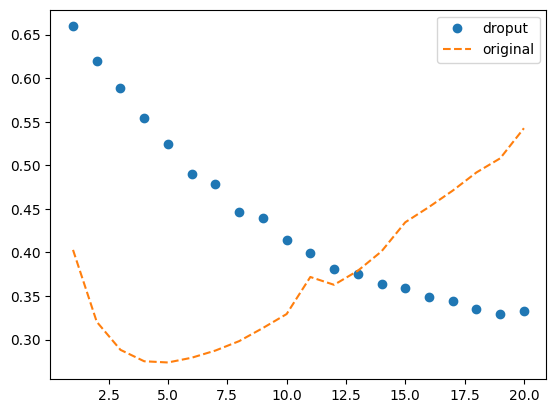

In [29]:
import matplotlib.pyplot as plt
history_dict=hitory.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
val_loss_values_4=hitory4.history['val_loss']


epochs=range(1, len(loss_values)+1)
plt.plot(epochs, val_loss_values_4, 'o', label='droput')


plt.plot(epochs, val_loss_values, '--', label='original')
plt.legend()
plt.show()